# Аналитик данных. Тестовое задание.

## Содержание

1. [Общая информация](#info)
2. [Предобработка данных](#predobrabotka)
3. [Исследование](#issledovanie)
4. [Итоговые выводы](#itog)

## Общая информация <a id='info'></a>

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
data = pd.read_excel('C:/Users/79283/Desktop/Analytic_test.xlsx', header=1)
data.head()

,Unnamed: 0,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В файле содержатся данные, в упорядоченном формате, о 4 компаниях: Red, Green, Blue, Black.<br>
По компаниям представлены следующие данные:
* HID - human_id, зашифрованный персональный идентификатор пользователя компаний
* has_company_id - наличие зарегистрированного аккаунта в компании
* company_gmv_total - суммарный gmv пользователя в сервисе
* company_gmv_order_count - количество успешных заказов пользователя в сервисе
* company_activity_count - количество активных действий пользователя в сервисе
* company_android - установленное у пользователя приложение компании на платформе android
* company_apple - установленное у пользователя приложение компании на платформе apple
* company_web - установленное у пользователя приложение компании на ПК
* is_msk - территориальное расположение в Москве

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   HID                    100000 non-null  object 
 2   active_Red             100000 non-null  float64
 3   has_Green_id           100000 non-null  float64
 4   has_Black_id           100000 non-null  float64
 5   has_Blue_id            100000 non-null  float64
 6   Blue_activity_count    100000 non-null  object 
 7   Blue_gmv_total         99999 non-null   float64
 8   Green_gvm_total        100000 non-null  float64
 9   Green_gvm_order_count  100000 non-null  object 
 10  Black_gvm_total        100000 non-null  float64
 11  Black_gvm_order_count  100000 non-null  object 
 12  Red_android            100000 non-null  float64
 13  Green_android          100000 non-null  float64
 14  Black_android          100000 non-nul

В данных присутствуют не все данные, отсутствуют следующие столбцы:
* has_red_id
* red_gmv_total
* red_gmv_order_count
* blue_gmv_order_count
* red_activity_count
* green_activity_count
* black_activity_count

В идеале должно было быть 30 столбцов. Более того у нас есть неизвестный столбец *active_red*. Предстоит разобраться, что он означает.

**Задача.** Провести анализ и сформулировать выводы на основании данных.

**План.**
1. Провести обработку данных
2. Рассмотреть метрику GMV по каждой из компаний
3. Рассмотреть подробнее пользователей
4. Рассмотреть платформы
5. Проверить гипотзу о жителях Москвы

## Предобработка данных <a id='predobrabotka'></a>

### Наименования столбцов <a id='naimenovanie'></a>

На основании данных, мы предполагаем, что перед нами данные о пользователях и их отношении к разным компаниям, сервисами которых они пользуются. 

В таблице есть ошибки в названиях столбцов, поэтому мы их подправим:

In [5]:
data.columns

Index(['Unnamed: 0', 'HID', 'active_Red', 'has_Green_id', 'has_Black_id',
       'has_Blue_id', 'Blue_activity_count', 'Blue_gmv_total',
       'Green_gvm_total', 'Green_gvm_order_count', 'Black_gvm_total',
       'Black_gvm_order_count', 'Red_android', 'Green_android',
       'Black_android', 'Blue_android', 'Red_apple', 'Green_apple',
       'Black_apple', 'Blue_apple', 'is_msk', 'Red_web', 'Green_web',
       'Black_web', 'Blue_web'],
      dtype='object')

In [6]:
data.columns = ['Unnamed: 0', 'hid', 'active_red', 'has_green_id', 'has_black_id',
       'has_blue_id', 'blue_activity_count', 'blue_gmv_total',
       'green_gmv_total', 'green_gmv_order_count', 'black_gmv_total',
       'black_gmv_order_count', 'red_android', 'green_android',
       'black_android', 'blue_android', 'red_apple', 'green_apple',
       'black_apple', 'blue_apple', 'is_msk', 'red_web', 'green_web',
       'black_web', 'blue_web']

Так же удалим первый столбец, так как он просто указывает на номер строки:

In [7]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,hid,active_red,has_green_id,has_black_id,has_blue_id,blue_activity_count,blue_gmv_total,green_gmv_total,green_gmv_order_count,black_gmv_total,...,blue_android,red_apple,green_apple,black_apple,blue_apple,is_msk,red_web,green_web,black_web,blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Тип столбцов и пропуски <a id='tipstolbcov'></a>

На этапе знакомства с данными, методом `info()`, мы обнаружили, что некоторые столбцы имеют строковый тип данных. Изменим их на целочисленный.

In [8]:
# for column in ['blue_activity_count', 'green_gmv_order_count', 'black_gmv_order_count']:
#     data[column] = pd.to_numeric(data[column], downcast='integer')

# # data.info()

Код выше вывел ошибку, потому что в столбцах содержатся значения, которые не переводятся в целочисленный тип, посмотрим на уникальные значения этих столбцов и исправим вручную.

In [9]:
for column in ['blue_activity_count', 'green_gmv_order_count', 'black_gmv_order_count']:
    print(f'{column.upper()}\n', data[column].unique(), '\n')


BLUE_ACTIVITY_COUNT
 ['2.0' '0.0' '1.0' '17.0' '13.0' '5.0' '6.0' '26.0' '8.0' '4.0' '27.0'
 '19.0' '12.0' '9.0' '3.0' '20.0' '10.0' '23.0' '7.0' '16.0' '14.0' '15.0'
 '53.0' datetime.datetime(2019, 5, 4, 0, 0) '32.0' '11.0' '18.0' '24.0'
 '119.0' '49.0' '39.0' '21.0' datetime.datetime(2019, 5, 7, 0, 0) '35.0'
 '72.0' '30.0' '71.0' '28.0' '42.0' '34.0' '41.0' '22.0' '29.0' '36.0'
 '90.0' '40.0' '43.0' datetime.datetime(2019, 5, 1, 0, 0) '51.0' '44.0'
 '25.0' '31.0' '45.0' '67.0' '33.0' '101.0' '74.0' '46.0' '111.0' '66.0'
 '38.0' '63.0' '100.0' '237.0' '59.0' datetime.datetime(2019, 5, 3, 0, 0)
 datetime.datetime(2019, 5, 6, 0, 0) '37.0' '47.0'] 

GREEN_GMV_ORDER_COUNT
 ['0.0' '2.0' '26.0' '5.0' '37.0' '3.0' '12.0' '7.0' '1.0' '6.0' '8.0'
 datetime.datetime(2019, 5, 4, 0, 0) '4.0' '40.0' '9.0' '22.0' '14.0'
 '15.0' '85.0' '25.0' '10.0' '20.0' '18.0' '11.0' '31.0' '23.0' '39.0'
 '13.0' '42.0' '127.0' '28.0' '101.0' '32.0' '30.0' '27.0' '51.0' '83.0'
 '36.0' '16.0' '64.0' '19.0' '29.0' '

В численных столбцах почему-то содержатся даты. Эти значения необходимо удалить, для этого мы сперва заменим их на *NaN*, а затем удалим.

In [10]:
for column in ['blue_activity_count', 'green_gmv_order_count', 'black_gmv_order_count']:
    data[column] = pd.to_numeric(data[column], downcast='integer', errors='coerce')

Удалим строки, в которых есть пропуски, и обновим индексы строк.

In [11]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99986 entries, 0 to 99985
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hid                    99986 non-null  object 
 1   active_red             99986 non-null  float64
 2   has_green_id           99986 non-null  float64
 3   has_black_id           99986 non-null  float64
 4   has_blue_id            99986 non-null  float64
 5   blue_activity_count    99986 non-null  float64
 6   blue_gmv_total         99986 non-null  float64
 7   green_gmv_total        99986 non-null  float64
 8   green_gmv_order_count  99986 non-null  float64
 9   black_gmv_total        99986 non-null  float64
 10  black_gmv_order_count  99986 non-null  float64
 11  red_android            99986 non-null  float64
 12  green_android          99986 non-null  float64
 13  black_android          99986 non-null  float64
 14  blue_android           99986 non-null  float64
 15  re

### Столбец active_red <a id='stolbecactive'></a>

Этот столбец может принадлежать к одному из 4 типов столбцов, для начала посмотрим на значения, которые он хранит:

In [12]:
data['active_red'].value_counts()

1.0    55864
0.0    44122
Name: active_red, dtype: int64

Вероятно, он принадлежит булевому типу, но сравним с некоторыми остальными столбцами, которые по идее, должны хранить в себе куда более разные значения. Определим этот столбец к тому, который будет больше похож на него.

In [13]:
def print_value_counts(*column_names):
    for name in column_names:
        print(name.upper(), '\n', data[name].sort_values().value_counts(), '\n')

In [14]:
print_value_counts('has_green_id', 'blue_activity_count', 'black_gmv_total', 'green_gmv_order_count')

HAS_GREEN_ID 
 0.0    99104
1.0      881
2.0        1
Name: has_green_id, dtype: int64 

BLUE_ACTIVITY_COUNT 
 0.0      96108
1.0       1368
2.0        625
3.0        425
4.0        288
         ...  
67.0         1
66.0         1
59.0         1
38.0         1
237.0        1
Name: blue_activity_count, Length: 64, dtype: int64 

BLACK_GMV_TOTAL 
 0.0         98910
1700.0          8
1598.0          7
1200.0          5
2460.0          5
            ...  
3812.0          1
3816.0          1
3834.0          1
3840.0          1
188252.0        1
Name: black_gmv_total, Length: 910, dtype: int64 

GREEN_GMV_ORDER_COUNT 
 0.0      99104
1.0        237
2.0        124
4.0         81
3.0         70
         ...  
52.0         1
56.0         1
60.0         1
62.0         1
168.0        1
Name: green_gmv_order_count, Length: 69, dtype: int64 



Вероятно, столбец *active_red* - это наш отсутствующий столбец *has_red_id*. Однако мы нашли еще одно несоответствие: столбец *has_green_id* имеет в себе значение 2. С этим мы разберемся на следующем шаге, а сейчас определим *active_red* как *has_red_id*.

In [15]:
data = data.rename(columns={'active_red': 'has_red_id'})

### Уникальные значения и соответствие столбцов <a id='unikalnie'></a>

Как мы уже выяснили, в данных очень много ошибок, которые предстоит убрать. На этом шаге мы разделим все столбцы на группы, выведем их уникальные значения. Мы должны убедиться в том, что названия столбцов соответствуют их содержанию, а также содержание соответствует реальности (в булевом столбце не может быть 3 разных значения).

#### has_company_id

Столбец должен иметь в себе значения 0 и 1.

In [16]:
print_value_counts('has_red_id', 'has_green_id', 'has_blue_id', 'has_black_id')

HAS_RED_ID 
 1.0    55864
0.0    44122
Name: has_red_id, dtype: int64 

HAS_GREEN_ID 
 0.0    99104
1.0      881
2.0        1
Name: has_green_id, dtype: int64 

HAS_BLUE_ID 
 0.0    86732
1.0    12746
2.0      495
3.0       12
4.0        1
Name: has_blue_id, dtype: int64 

HAS_BLACK_ID 
 0.0    98910
1.0     1074
2.0        2
Name: has_black_id, dtype: int64 



* has_green_id имеет выброс в значении 2
* has_black_id имеет выбросы в значении 2
* has_blue_id имеет множество выбросов

In [17]:
data = data[(data['has_green_id'] < 2) &
           (data['has_blue_id'] < 2) &
           (data['has_black_id'] < 2)]

#### company_gmv_total

In [18]:
print_value_counts('green_gmv_total', 'blue_gmv_total', 'black_gmv_total')

GREEN_GMV_TOTAL 
 0.0        98601
500.0         29
400.0         28
900.0         14
1000.0        13
           ...  
2908.0         1
2914.0         1
2924.0         1
2936.0         1
94106.0        1
Name: green_gmv_total, Length: 672, dtype: int64 

BLUE_GMV_TOTAL 
 0.0        99070
2.0           34
4.0           18
12.0          15
18.0           7
           ...  
392.0          1
402.0          1
406.0          1
408.0          1
32302.0        1
Name: blue_gmv_total, Length: 224, dtype: int64 

BLACK_GMV_TOTAL 
 0.0         98410
1598.0          7
1700.0          7
1200.0          5
1300.0          5
            ...  
3800.0          1
3810.0          1
3812.0          1
3816.0          1
188252.0        1
Name: black_gmv_total, Length: 901, dtype: int64 



Эти столбцы соответствуют своим своим названиям ✅. Можно отметить что присутствуют выбросы, к этому мы вернемся на дальнейших этапах.

#### company_gmv_order_count

В этом столбце мы не ожидаем увидеть тысячные значения.

In [19]:
print_value_counts('green_gmv_order_count', 'black_gmv_order_count')

GREEN_GMV_ORDER_COUNT 
 0.0      98601
1.0        235
2.0        123
4.0         81
3.0         68
         ...  
52.0         1
56.0         1
60.0         1
62.0         1
168.0        1
Name: green_gmv_order_count, Length: 69, dtype: int64 

BLACK_GMV_ORDER_COUNT 
 0.0     98410
1.0       441
2.0       184
3.0       116
4.0        79
5.0        43
6.0        32
8.0        28
7.0        21
10.0       19
9.0        16
12.0       13
11.0        8
15.0        8
14.0        6
26.0        5
18.0        5
20.0        4
25.0        4
13.0        4
17.0        3
19.0        3
22.0        3
16.0        3
21.0        2
23.0        2
51.0        2
35.0        2
37.0        1
50.0        1
42.0        1
29.0        1
36.0        1
34.0        1
33.0        1
27.0        1
60.0        1
Name: black_gmv_order_count, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_activity_count

In [20]:
print_value_counts('blue_activity_count')

BLUE_ACTIVITY_COUNT 
 0.0      95922
1.0       1280
2.0        572
3.0        385
4.0        260
         ...  
66.0         1
59.0         1
53.0         1
38.0         1
237.0        1
Name: blue_activity_count, Length: 64, dtype: int64 



С этим столбцом все в порядке. ✅

#### company_android

In [21]:
print_value_counts('red_android', 'blue_android', 'green_android', 'black_android')

RED_ANDROID 
 0.0    67642
1.0    31833
Name: red_android, dtype: int64 

BLUE_ANDROID 
 0.0    91658
1.0     7817
Name: blue_android, dtype: int64 

GREEN_ANDROID 
 0.0    98937
1.0      538
Name: green_android, dtype: int64 

BLACK_ANDROID 
 0.0    98413
1.0     1062
Name: black_android, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_apple

In [22]:
print_value_counts('red_apple', 'blue_apple', 'green_apple', 'black_apple')

RED_APPLE 
 0.0    88707
1.0    10768
Name: red_apple, dtype: int64 

BLUE_APPLE 
 0.0    94926
1.0     4549
Name: blue_apple, dtype: int64 

GREEN_APPLE 
 0.0    98865
1.0      610
Name: green_apple, dtype: int64 

BLACK_APPLE 
 0.0    97718
1.0     1757
Name: black_apple, dtype: int64 



С этими столбцами все в порядке. ✅

#### company_web

In [23]:
print_value_counts('red_web', 'blue_web', 'green_web', 'black_web')

RED_WEB 
 1.0    66680
0.0    32795
Name: red_web, dtype: int64 

BLUE_WEB 
 0.0    89012
1.0    10463
Name: blue_web, dtype: int64 

GREEN_WEB 
 0.0    99279
1.0      196
Name: green_web, dtype: int64 

BLACK_WEB 
 0.0    98022
1.0     1453
Name: black_web, dtype: int64 



С этими столбцами все в порядке. ✅

### Дубликаты <a id='dublikati'></a>

Раз мы нашли столько ошибок в данных, стоит проверить их на наличие дубликатов. Дубликаты мы будем проверять по столбцу *hid*, так как идентификатор пользователя должен быть всего один.

In [24]:
data['hid'].duplicated().sum()

0

Дубликаты отсутствуют. ✅

Наш итоговый датасет выглядит следующим образом:

In [25]:
data.head()

,hid,has_red_id,has_green_id,has_black_id,has_blue_id,blue_activity_count,blue_gmv_total,green_gmv_total,green_gmv_order_count,black_gmv_total,...,blue_android,red_apple,green_apple,black_apple,blue_apple,is_msk,red_web,green_web,black_web,blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Исследование <a id='issledovanie'></a>

### Суммы продаж <a id='summiprodaj'></a>

В таблице есть информация о метрике *GMV (Gross Merchandise Volume)*. Эта метрика показывает общий объем продаж. С ее помощью можно определить *AOV (Average Order Value или средняя сумма транзакции)*, а также *концентрацию GMV*, что покажет активность пользователей в компании.

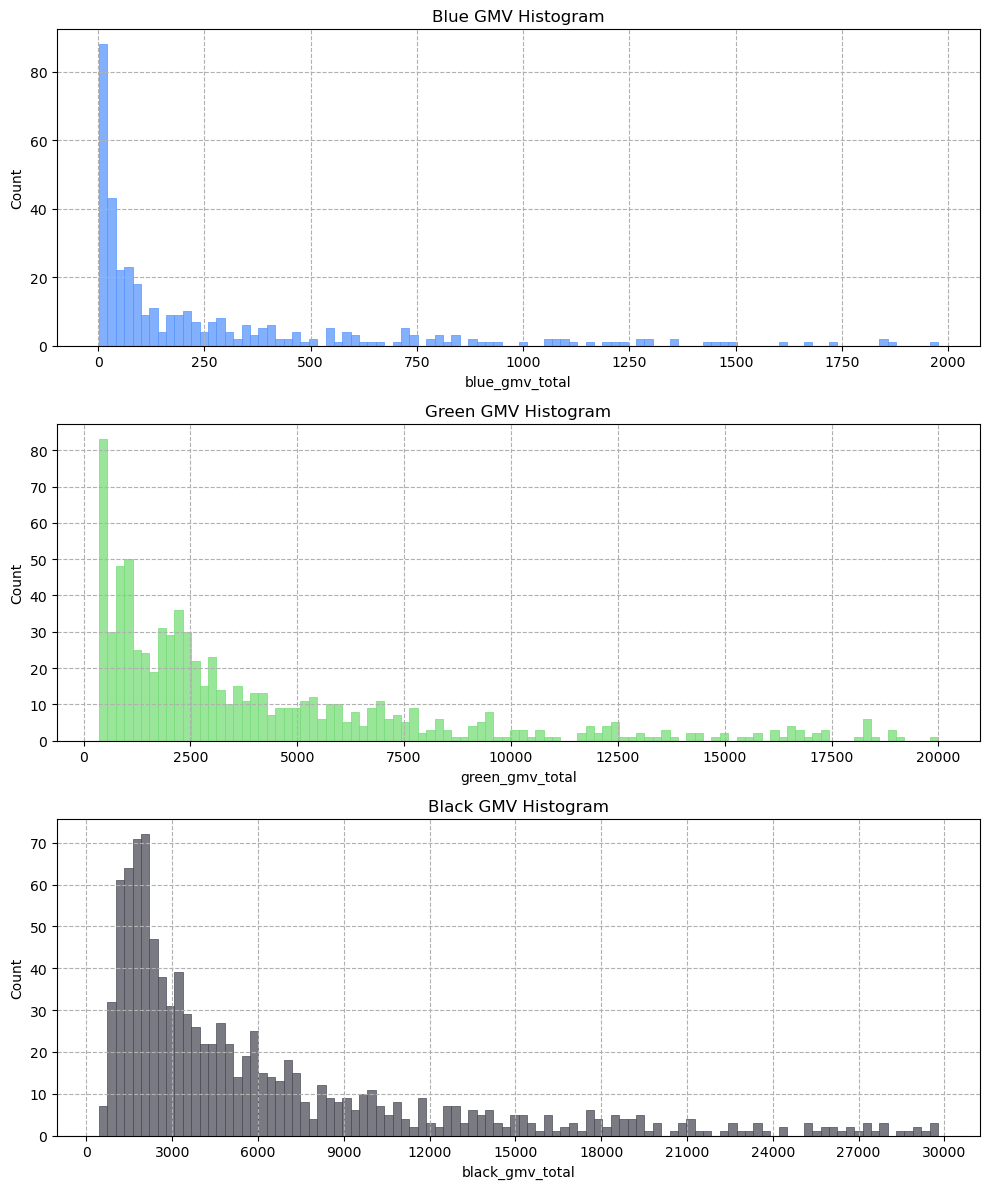

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,12))

plt.xticks(range(0,2001, 200))
sns.histplot(data.query('0 < blue_gmv_total < 2000')['blue_gmv_total'], color='#5996fc', edgecolor='#5996fc', bins=100, ax=ax1)

plt.xticks(range(0,20001, 2000))
sns.histplot(data.query('0 < green_gmv_total < 20000')['green_gmv_total'], color='#77DD77', edgecolor='#77DD77', bins=100, ax=ax2)

plt.xticks(range(0,30001, 3000))
sns.histplot(data.query('0 < black_gmv_total < 30000')['black_gmv_total'], color='#4E4E5A', edgecolor='#4E4E5A', bins=100, ax=ax3)

ax1.set_title('Blue GMV Histogram')
ax2.set_title('Green GMV Histogram')
ax3.set_title('Black GMV Histogram')
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
ax3.grid(linestyle='--')

plt.tight_layout()
plt.show()

Во всех трех компаниях есть аномально большие значения сумм транзакций, поэтому мы ограничили графики справа.

Как мы видим, в компании Blue суммы *GMV* на порядок меньше чем в компаниях Green и Black. A Black в свою очередь имеет самые дорогие продажи. Приведем некоторую статистику ниже:

In [27]:
print('BLUE_GMV_TOTAL\n', data.query('0 < blue_gmv_total < 2000')['blue_gmv_total'].describe(), 
      '\n------------')
print('GREEN_GMV_TOTAL\n', data.query('0 < green_gmv_total < 20000')['green_gmv_total'].describe(), 
      '\n------------')
print('BLACK_GMV_TOTAL\n', data.query('0 < black_gmv_total < 30000')['black_gmv_total'].describe())

BLUE_GMV_TOTAL
 count     377.000000
mean      274.095491
std       391.981344
min         2.000000
25%        24.000000
50%        96.000000
75%       356.000000
max      1976.000000
Name: blue_gmv_total, dtype: float64 
------------
GREEN_GMV_TOTAL
 count      803.000000
mean      4126.064757
std       4210.308789
min        362.000000
25%       1106.000000
50%       2480.000000
75%       5572.000000
max      19990.000000
Name: green_gmv_total, dtype: float64 
------------
BLACK_GMV_TOTAL
 count     1008.000000
mean      6234.994048
std       6179.920820
min        440.000000
25%       1993.000000
50%       3799.000000
75%       8104.000000
max      29776.000000
Name: black_gmv_total, dtype: float64


Мы получили информацию, какой оборот компания имеет с человека в среднем. И в какой области лежит это среднее значение.

Следующие цифры:
- Blue - 274 на человека, основной диапазон [24, 356]
- Green - 4126 на человека, основной диапазон [1106, 5572]
- Black - 6234 на человека, основной диапазон [1993, 8104]

Эта цифра рассчитывалась путем суммы всего GMV и разделения этой суммы на количество пользователей. Сразу можно получить информацию о то, какая в среднем сумма заказа в этой компании. Для этого мы весь GMV поделим на количество транзакций и получим метрику **AOV (Average Order Value)**.

In [32]:
green_aov = (data.query('0 < green_gmv_total < 20000')['green_gmv_total'].sum() / 
           data.query('0 < green_gmv_total < 20000')['green_gmv_order_count'].sum())
black_aov = (data.query('0 < black_gmv_total < 30000')['black_gmv_total'].sum() / 
           data.query('0 < black_gmv_total < 30000')['black_gmv_order_count'].sum())

print('Green AOV -', green_aov)
print('Black AOV -', black_aov)

Green AOV - 780.1342123852131
Black AOV - 2079.0188554416145


Необходимых данных за компанию Blue мы не имеем.

Сравнивая отношение среднего GMV за человека к показателю AOV, мы можем сделать вывод, что в компании Green человек покупает чаще, чем в Black. В компании Green человек в среднем совершает 5.29 заказов (4126 / 780), когда в компании Black всего 3.

**Выводы.** 
1. Аудитория компании Blue **в 2 раза меньше** чем у компании Green и Black.
2. Средняя сумма продаж с пользователя в Blue **в 10 раз меньше** чем у компании Green и Black.
3. В компании Black объем продаж на человека **больше всего - 6234.**
4. В компании Green человек в среднем совершает 5.29 заказов, когда в компании Black всего 3.

### Возвращаемость клиентов <a id='vozvrat'></a>

Графики выше ограничены слева, потому что подавляющее большинство пользователей в данных не совершило ни одного заказа. Сейчас мы посчитаем какая доля из зарегистрированных пользователей компании совершило заказ, а каких можно назвать активными клиентами.

Мы будем искать метрику **RPR (Repeat Purchase Ratio)**, она показывает какая доля пользователей совершивших заказ совершает повторный заказ.

Функция ниже:
1. Считает зарегистрированных пользователей. 
2. Находит тех кто совершил указанное количество заказов и больше (параметр threshold).
3. Считает метрику RPR.

In [33]:
def get_conversion(has_company_id, gmv_order_count, threshold):
    all_clients = data[data[has_company_id] == 1.]
    
    best_clients = all_clients[all_clients[gmv_order_count] >= threshold]
    
    total = all_clients[has_company_id].sum()
    useful = best_clients[gmv_order_count].count()
    conversion = round(useful / total, 3)
    
    return conversion

Можно увидеть, как много пользователей возвращается после соверешения заказа. Для green и black компаний мы посчитаем эти значения, с помощью последовательного вызова функции выше с увеличением threshold.

In [34]:
green_rpr = [get_conversion('has_green_id', 'green_gmv_order_count', i) for i in range(1, 11)]
black_rpr = [get_conversion('has_black_id', 'black_gmv_order_count', i) for i in range(1, 11)]
x = range(1, 11)

Время построить графики:

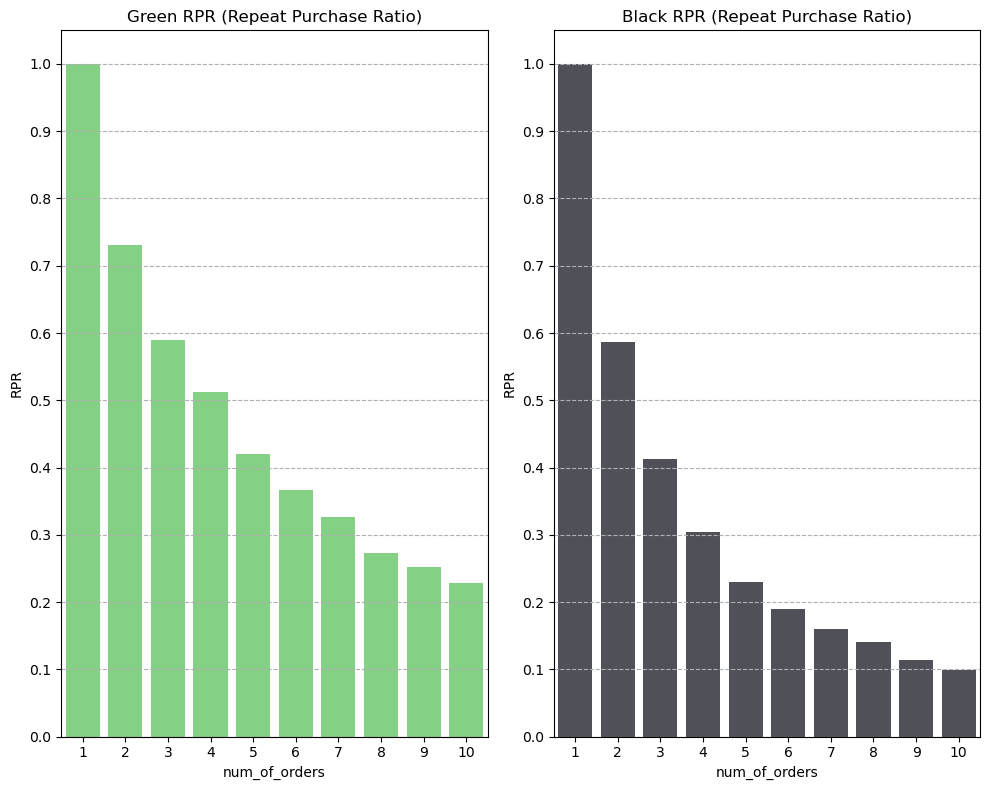

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))

#функция barplot требует на входе датафрейм, и чтобы не создавать много одноразовых переменных, 
#я решил вызывать датафреймы прямо в функции, хоть это и делает код менее красивым
sns.barplot(data = pd.DataFrame({'RPR': green_rpr, 'num_of_orders': x}), 
            y='RPR', x='num_of_orders', color='#77DD77', ax=ax1)

sns.barplot(data=pd.DataFrame({'RPR': black_rpr, 'num_of_orders': x}), 
            y='RPR', x='num_of_orders', color='#4E4E5A', ax=ax2)

ax1.set_title('Green RPR (Repeat Purchase Ratio)')
ax2.set_title('Black RPR (Repeat Purchase Ratio)')
ax1.grid(linestyle='--', axis='y')
ax2.grid(linestyle='--', axis='y')
ax1.set_yticks(np.arange(0, 1.1, .1))
ax2.set_yticks(np.arange(0, 1.1, .1))

plt.tight_layout()
plt.show()

Можно заметить что 1 заказ совершило 100% пользователей, так как мы избирали людей зарегистрированных в компании, выходит, что каждый зарегистрированный должен обязательно совершить заказ.

Это уже не новость, но пользователь в компании Green заказывает гораздо чаще чем в Black, несмотря на то, что в Black оборот за человека больше. В компании Green, половина пользователей сделавших 1 заказ делает и 5-й. В то время как в компании Black до 5-го заказа доходит около четверти.

### Концентрация GMV и самые активные клиенты <a id='concentracia'></a>

Концентрация GMV покажет, какую долю всего оборота составляют самые активные клиенты. Самыми активными клиентами, мы назовем тех, кто совершает больше всего заказов и выделяется из скопления.

Считается, что 20% пользователей составляет 80% активности. Таким образом мы выберем первые 20% людей с самым большим количеством заказов и найдем, какую часть от общего GMV они составляют.

In [68]:
def get_gmv_conc(order_count, gmv_total, threshold, outliers_border):
    data_filtered = data.query(f'{order_count} > 0')
    data_filtered = data_filtered.query(f'{gmv_total} < {outliers_border}')
    num_of_bests = int(len(data_filtered) * threshold)
    index_of_best = data_filtered[order_count].sort_values(ascending=False)[:num_of_bests].index
    
    gmv_conc = data_filtered.loc[index_of_best][gmv_total].sum() / data_filtered[gmv_total].sum()
    return round(gmv_conc, 2)

Как и на прошлом шаге, подготовим данные для графиков:

In [78]:
green_gmv_conc = [get_gmv_conc('green_gmv_order_count', 'green_gmv_total', i, 20000) for i in np.arange(1, 0, -0.1)]
black_gmv_conc = [get_gmv_conc('black_gmv_order_count', 'black_gmv_total', i, 30000) for i in np.arange(1, 0, -0.1)]
#без функции round на графике выводятся слишком длинные значения с плавающей точкой
x = np.round(np.arange(1, 0, -0.1), 1)

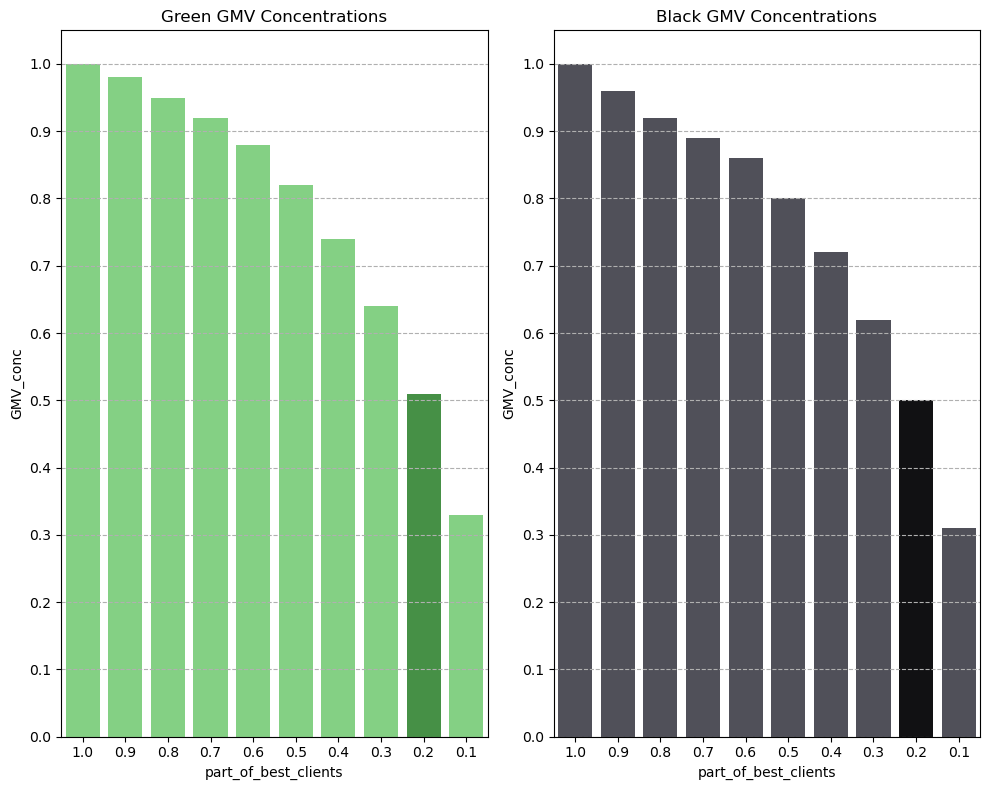

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))

#чтобы закрасить одну колонку, необходимо прописать условие в параметре palette. Задумывалось, что если x!=0.2,
#то закрашиваем обычным цветов, но matplotlib зачем-то зеркалит ось x, из за чего 0.2 - на самом деле является 0.9
#invert_xaxis() не устраняет эту особенность
sns.barplot(data = pd.DataFrame({'GMV_conc': green_gmv_conc, 'part_of_best_clients': x}), 
            y='GMV_conc', x='part_of_best_clients', ax=ax1,
            palette=['#77DD77' if x!=0.9 else '#3A9C3A' for x in x])

sns.barplot(data=pd.DataFrame({'GMV_conc': black_gmv_conc, 'part_of_best_clients': x}), 
            y='GMV_conc', x='part_of_best_clients', ax=ax2,
            palette=['#4E4E5A' if x!=0.9 else '#101014' for x in x])

ax1.set_title('Green GMV Concentrations')
ax2.set_title('Black GMV Concentrations')
ax1.grid(linestyle='--', axis='y')
ax2.grid(linestyle='--', axis='y')
ax1.set_yticks(np.arange(0, 1.1, .1))
ax2.set_yticks(np.arange(0, 1.1, .1))
ax1.invert_xaxis()
ax2.invert_xaxis()


plt.tight_layout()
plt.show()

Как мы видим в обеих компаниях, 20% самых активных людей содержат в себе целую половину от всего оборота. А 10% - содержит целую треть.

### Распространенность среди платформ <a id='rasprostr'></a>

Первым делом мы рассчитаем долю пользователей по каждой компании, которые пользуются той или иной платформой. Мы ожидаем увидеть какое-то различие в предпочтениях.

In [143]:
def preferences_in_platforms(company):
    users = data[data[f'has_{company}_id'] == 1]
    androids = users[users[f'{company}_android'] == 1]
    apples = users[users[f'{company}_apple'] == 1]
    webbed = users[users[f'{company}_web'] == 1]
    
    print(company.upper())
    print('Пользователей на Android -', round(len(androids) / len(users) * 100, 2), '%')
    print('Пользователей на Apple -', round(len(apples) / len(users) * 100, 2), '%')
    print('Пользователей на ПК -', round(len(webbed) / len(users) * 100, 2), '%')

In [145]:
for company in ['red', 'blue', 'green', 'black']:
    preferences_in_platforms(company)
    print()

RED
Пользователей на Android - 44.82 %
Пользователей на Apple - 16.25 %
Пользователей на ПК - 81.49 %

BLUE
Пользователей на Android - 22.49 %
Пользователей на Apple - 13.13 %
Пользователей на ПК - 22.01 %

GREEN
Пользователей на Android - 20.48 %
Пользователей на Apple - 25.86 %
Пользователей на ПК - 2.97 %

BLACK
Пользователей на Android - 21.5 %
Пользователей на Apple - 30.52 %
Пользователей на ПК - 16.06 %



Результаты вышли такими, по которым, к сожалению нельзя построить красивый график. Можно обратить внимание, что в компаниях Blue, Green и Black сумма процентов меньше 100. Выходит, существуют пользователи этих компаний, которые пользуются неизвестными нам платформами?

In [158]:
def invisible_users(company):
    all_users = data[data[f'has_{company}_id'] == 1]
    invisible_users = all_users[(all_users[f'{company}_android'] == 0) & 
                                (all_users[f'{company}_apple'] == 0) & 
                                (all_users[f'{company}_web'] == 0)]
    print(f'Процент пользователей с неизвестными платформами в {company} -', 
          round(len(invisible_users) / len(all_users) * 100, 2), '%')

In [159]:
for company in ['red', 'blue', 'green', 'black']:
    invisible_users(company)
    print()

Процент пользователей с неизвестными платформами в red - 6.67 %

Процент пользователей с неизвестными платформами в blue - 50.45 %

Процент пользователей с неизвестными платформами в green - 53.78 %

Процент пользователей с неизвестными платформами в black - 42.72 %



**Выводы**
1. Пользователи компании Red больше всего предпочитают ПК, но также часто пользуются Android
2. Пользователи компании Green не используют ПК
3. Пользователи Blue и Black примерно одинаково пользуются всеми платформами
4. Почти половина пользователей компаний Blue, Green и Black не пользуются ни одной из трех платформ

### Проверка гипотезы <a id='proverka'></a>

Гипотеза звучит так: "Отличается ли GMV с пользователя из Москвы от пользователя из другого региона?"

Гипотезу мы проверим по пользователям по каждой из компаний Т-тестом. Если значение p будет меньше определенного порога, то отвергать гипотезу мы не будем.

In [113]:
def get_samples(has_company_id, company_gmv_total):
    sample1 = data[(data[has_company_id]==1) & (data['is_msk']==1)][company_gmv_total]
    sample2 = data[(data[has_company_id]==1) & (data['is_msk']==0)][company_gmv_total]
    
    return sample1, sample2

In [126]:
def take_ttest(sample1, sample2, alpha, equal_var):
    sample_1 = sample1
    sample_2 = sample2
    alpha = alpha

    results = stats.ttest_ind(sample_1, sample_2, equal_var=equal_var)

    print('р-значение -', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
        print('Есть основания полагать, что выборки отличаются')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
        print('Скорее всего выборки не отличаются')

#### Компания Blue

In [133]:
sample1, sample2 = get_samples('has_blue_id', 'blue_gmv_total')

print('Дисперсия первой выборки -', np.var(sample1, ddof=1))
print('Общая статистика:\n', sample1.describe(), '\n')

print('Дисперсия второй выборки -', np.var(sample2, ddof=1))
print('Общая статистика:\n', sample2.describe(), '\n')

Дисперсия первой выборки - 88938.90869454248
Общая статистика:
 count    2031.000000
mean       28.635155
std       298.226271
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      7286.000000
Name: blue_gmv_total, dtype: float64 

Дисперсия второй выборки - 131415.86695686882
Общая статистика:
 count    10715.000000
mean        16.383201
std        362.513265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      32302.000000
Name: blue_gmv_total, dtype: float64 



Очень много значений равно 0. Как мы помним, в компаниях Green и Black, зарегистрированный пользовать - это пользователь совершивший заказ. А здесь иначе.

Так же мы видим большое отличие в размерах выборок и дисперсиях. Параметр `equal_var=False` <br>
Обозначим значимость в *0.05*

In [134]:
take_ttest(sample1, sample2, 0.05, False)

р-значение - 0.1018461492874892
Не получилось отвергнуть нулевую гипотезу
Скорее всего выборки не отличаются


#### Компания Green

In [135]:
sample1, sample2 = get_samples('has_green_id', 'green_gmv_total')

print('Дисперсия первой выборки -', np.var(sample1, ddof=1))
print('Общая статистика:\n', sample1.describe(), '\n')

print('Дисперсия второй выборки -', np.var(sample2, ddof=1))
print('Общая статистика:\n', sample2.describe(), '\n')

Дисперсия первой выборки - 137351497.91600645
Общая статистика:
 count      669.000000
mean      7164.134529
std      11719.705539
min        400.000000
25%       1324.000000
50%       3030.000000
75%       7154.000000
max      94106.000000
Name: green_gmv_total, dtype: float64 

Дисперсия второй выборки - 92189449.88330945
Общая статистика:
 count      205.000000
mean      5576.195122
std       9601.533726
min        362.000000
25%       1000.000000
50%       2400.000000
75%       5912.000000
max      94078.000000
Name: green_gmv_total, dtype: float64 



Мы видим большое отличие в размерах выборок и дисперсиях. Параметр `equal_var=False` <br>
Обозначим значимость в *0.05*

In [136]:
take_ttest(sample1, sample2, 0.05, False)

р-значение - 0.05043853028239727
Не получилось отвергнуть нулевую гипотезу
Скорее всего выборки не отличаются


Спорный результат, p-значение едва-ли переходит границу, однако мы решили, что в этом случае мы будем отвергать гипотезу.

#### Компания Black

In [138]:
sample1, sample2 = get_samples('has_black_id', 'black_gmv_total')

print('Дисперсия первой выборки -', np.var(sample1, ddof=1))
print('Общая статистика:\n', sample1.describe(), '\n')

print('Дисперсия второй выборки -', np.var(sample2, ddof=1))
print('Общая статистика:\n', sample2.describe(), '\n')

Дисперсия первой выборки - 218751217.08593056
Общая статистика:
 count       385.000000
mean      11560.711688
std       14790.240603
min         610.000000
25%        2600.000000
50%        5880.000000
75%       13750.000000
max      111754.000000
Name: black_gmv_total, dtype: float64 

Дисперсия второй выборки - 171439977.7113055
Общая статистика:
 count       680.000000
mean       7211.505882
std       13093.508992
min         440.000000
25%        1812.000000
50%        3360.000000
75%        7197.000000
max      188252.000000
Name: black_gmv_total, dtype: float64 



Параметр `equal_var=False` <br>
Обозначим значимость в *0.05*

In [132]:
take_ttest(sample1, sample2, 0.05, False)

р-значение - 1.911391055225935e-06
Отвергаем нулевую гипотезу
Есть основания полагать, что выборки отличаются


p-значение в 10000 раз меньше 1%, скорее всего оборот с жителя Москвы будет отличаться от жителя другого региона.

## Итоговые выводы <a id='itog'></a>

Мы обработали данные о пользователях в различных компаниях. Обработали наименования столбцов, их типы, обработали ошибки в данных. Выяснилось, что данных о компании Red совсем не хватает для анализа, так же присутствует не много информации о компании Blue.

#### Суммы продаж

Была проведена исследовательская работа по **обороту продаж** среди пользователей в компаниях Blue, Green, Black. Мы выяснили:
* Оборот продаж на одного человека в компании Blue более чем в 10 раз меньше чем в остальных рассматриваемых компаниях - 274
* Самый большой GMV на человека имеет компания Black - 6234, компания Green отстает но не намного - 4126
* В каждой из трех компаний присутствует 1 пользователь с колоссальным значением оборота, возможно это выброс или ошибка
* Аудитория компании Blue в 2 раза меньше чем в Green и Black

Для компаний Green и Black мы смогли рассчитать **AOV**, показывающий среднюю цену за один заказ:
* Green AOV = 780.13
* Black AOV = 2079.02

Это в свою очередь говорит о том, что в компании Green человек покупает чаще, чем в Black. В компании Green человек в среднем совершает 5.29 заказов, когда в компании Black всего 3.

#### Возвращаемость клиентов

Далее мы рассматривали возвращаемость клиентов через оценку метрики **RPR**, мы вывели графики и выяснили какая доля пользователей делает определенную по счету покупку после первой покупки. Другими словами:
- В компании Green, ~73% пользователей, совершивших первую покупку, совершают и вторую. Так же ~50% этих же пользователей совершают и 4 покупку, а ~23% доходят и до 10 покупки.
- В компании Black результаты несколько хуже, ~58% - вторая покупка, ~31% - 4 покупка, 10% - 10 покупка

Так же чуть позже, на этапе проверки гипотез, было выяснено, что каждый зарегистрированный пользователь в компании Green и Black обязательно совершил хотя бы 1 покупку. В компании Blue можно зарегистрироваться не совершая ее.

Еще раз убедились, что несмотря на то, что в Black самый большой GMV на клиентов, в Green покупают гораздо больше.

#### Концентрация GMV и самые активные клиенты

Считается, что 20% пользователей составляет 80% активности. Для компаний Green и Black, мы отобрали 20% их самых активных пользователей, построили графики и выяснили, что в обеих компаниях, половина оборота продаж (GMV) держится на 20% самых активных пользователях. Графики по обеим компаниям почти идентичны.

#### Распространенность среди платформ

Мы рассмотрели предпочтения пользователей различных компаний в отношении использования платформ android, apple и ПК. И пришли в следующим результатам:
1. Пользователи компании Red больше всего предпочитают ПК, но также часто пользуются Android
2. Пользователи компании Green не используют ПК
3. Пользователи Blue и Black примерно одинаково пользуются всеми платформами
4. Почти половина пользователей компаний Blue, Green и Black не пользуются ни одной из трех платформ

#### Проверка гипотезы

Пользователи изначально поделены на тех кто проживает на территории Москвы и на всех остальных. Это значит, что можно проверить, различиается ли оборот продаж с этих двух групп пользователей? 

Для каждой из трех компаний (Blue, Green, Black) мы проверили эту гипотезу и выяснили следующиее:
1. В компании Blue, разницы между GMV пользователей Москвы и остальных регионов скорее всего нет.
2. В компании Green, разницы между GMV пользователей Москвы и остальных регионов скорее всего нет. Но стоит упомянуть, что значение p не перешло статистическую значимость всего лишь на 4 сотых доли.
3. В компании Black скорее всего существует разница между пользователями.

# Спасибо VK за проект :)